# Titanic Disaster Dataset ⛵

Hi, this dataset is the getting started in Kaggle. Many times i have entered Kaggle looking for solutions or different datasets. I have taken different machine learning courses and all of them, at one point or another, use a Kaggle dataset. And it makes sense, since all datasets are clean, divided into training and testing, with many features for you to explore. So i decided to jump into Kaggle and try my first competition, and the best starting point is the Titanic Dataset. For those who don't know, RMS Titanic was a British passenger liner operated by the White Star Line that sank in the North Atlantic Ocean in the early morning hours of 15 April 1912, yo can read more in [here](https://en.wikipedia.org/wiki/RMS_Titanic), and also there is a beautifull movie called Titanic also.

The idea is to use the Titanic passenger data (name, age, price of ticket, etc.) to try to predict who will survive and who will die. So let's start by loading the dataset. In my case i download it from [Kaggle](https://www.kaggle.com/c/titanic).

Let's start with our imports and extracting the .zip file. I'm setting a seabor style that i like.

In [543]:
import os
import zipfile
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None  # default='warn'
sns.set(style='whitegrid', palette='Set2', font_scale=1.2)

In [439]:
local_zip = 'titanic.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('titanic')
zip_ref.close()

In [544]:
train_data = pd.read_csv('titanic/train.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [545]:
test_data = pd.read_csv('titanic/test.csv')
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [546]:
print('Shape of train dataset {}'.format(train_data.shape))
print('Shape of test dataset {}'.format(test_data.shape))

Shape of train dataset (891, 12)
Shape of test dataset (418, 11)


We have our testing and training data loaded, the training dataset contains 891 training examples and 11 features excluding the label. Next is the description of the features.

- **Passenger ID** to identifiy the passenger, numerical feature (Passenger ID/Ticket Number).
- **Survived** is our label, as we can see is a binary feature, 1 if survived and 0 otherwise.
- **Pclass** is the Ticket class (1 = 1st (Upper), 2 = 2nd (Middle), 3 = 3rd (lower))
- **Age** is the age in years
- **sibsp** is the number of siblings / spouses aboard the Titanic
- **parch** is the number of parents / children aboard the Titanic
- **ticket** is the ticket number
- **fare** is the Passenger fare
- **cabin** is the cabin number
- **embarked** means Port of Embarkation. C = Cherbourg, Q = Queenstown, S = Southampton

Let's describe the data.

In [547]:
train_data.describe(include='all') # to see even categorical data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Lester, Mr. James",male,NaN,NaN,NaN,1601,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


By describing the data we can see we have many missing features. We have 891 passengers and 714 Ages confirmed, 204 cabin numbers and 889 embarked. Now, if you saw the movie you would agree with me in say that one of the missing ones is Jack Dawson (Leonardo Di Caprio in Titanic). Let's see if he is in this dataset.

In [548]:
train_data[train_data["Name"].str.contains('Jack', na=False)] # There is a Jackson but not Jack

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
766,767,0,1,"Brewe, Dr. Arthur Jackson",male,NaN,0,0,112379,39.6,NaN,C


## Processing missing data and duplicates

Before training a model to make any kind of classification or regression, first we have make sure our data is understandable and there is not garbage in it. Although cleaning data is not as entertained as training algorithms, this step is of criticall importance in every Machine Learning prokect. First let's check for missing values or duplicated ones.

In [549]:
print('\nNull Values in Training \n{}'.format(train_data.isnull().sum()))
print('\nNull Values in Testing \n{}'.format(test_data.isnull().sum()))

print('\nDuplicated values in train {}'.format(train_data.duplicated().sum()))
print('Duplicated values in test {}'.format(test_data.duplicated().sum()))


Null Values in Training 
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Null Values in Testing 
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Duplicated values in train 0
Duplicated values in test 0


#### Filling Embarked and Fare
We can see we have many missing values in Age and Cabin, as we supossed before in the describing part. Most of the missing data comes from the cabin feature, this could be because not everyone had a cabin. I remember from the movie that many were stowaways and many slept together in the same cabin. There are two missing values in embarked and one in Fare. We can fill the fare with the average value of fares, that's not a problem and fill the embarked with the most common port of embark.

In [550]:
print('Embarkation per ports \n{}'.format(train_data['Embarked'].value_counts()))

# since the most common port is Southampton the chances are that the missing one is from there
train_data['Embarked'].fillna(value='S', inplace=True)
test_data['Fare'].fillna(value=test_data.Fare.mean(), inplace=True)

print('Embarkation per ports after filling \n{}'.format(train_data['Embarked'].value_counts()))

Embarkation per ports 
S    644
C    168
Q     77
Name: Embarked, dtype: int64
Embarkation per ports after filling 
S    646
C    168
Q     77
Name: Embarked, dtype: int64


#### Filling Age
Ok, so we filled Embarked and Fare, now what can we do with Age?

To fill the age, we can check the titles (Miss, Mr, Mrs and Master) and take the average of each one, then fill the age according to the title. Yes, Master is one of the titles used in Titanic, is used for boys and young mens, mostly by english people. And also Dr, they used that title to, i don't understand why a Doctor can't be classified as a Mr.

In [551]:
# takes the dataset tha contains all the Misses 
train_data[train_data["Name"].str.contains('Mrs.', na=False)].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S


In [552]:
mean_age_miss = train_data[train_data["Name"].str.contains('Miss.', na=False)]['Age'].mean().round()
mean_age_mrs = train_data[train_data["Name"].str.contains('Mrs.', na=False)]['Age'].mean().round()
mean_age_mr = train_data[train_data["Name"].str.contains('Mr.', na=False)]['Age'].mean().round()
mean_age_master = train_data[train_data["Name"].str.contains('Master.', na=False)]['Age'].mean().round()

print('Mean age of Miss. title {}'.format(mean_age_miss))
print('Mean age of Mrs. title {}'.format(mean_age_mrs))
print('Mean age of Mr. title {}'.format(mean_age_mr))
print('Mean age of Master. title {}'.format(mean_age_master))

Mean age of Miss. title 22.0
Mean age of Mrs. title 36.0
Mean age of Mr. title 33.0
Mean age of Master. title 5.0


In [553]:
def fill_age(name_age):
    
    name = name_age[0]
    age = name_age[1]
    
    if pd.isnull(age):
        if 'Mr.' in name:
            return mean_age_mr
        if 'Mrs.' in name:
            return mean_age_mrs
        if 'Miss.' in name:
            return mean_age_miss
        if 'Master.' in name:
            return mean_age_master
        if 'Dr.' in name:
            return mean_age_master
        if 'Ms.' in name:
            return mean_age_miss
    else:
        return age

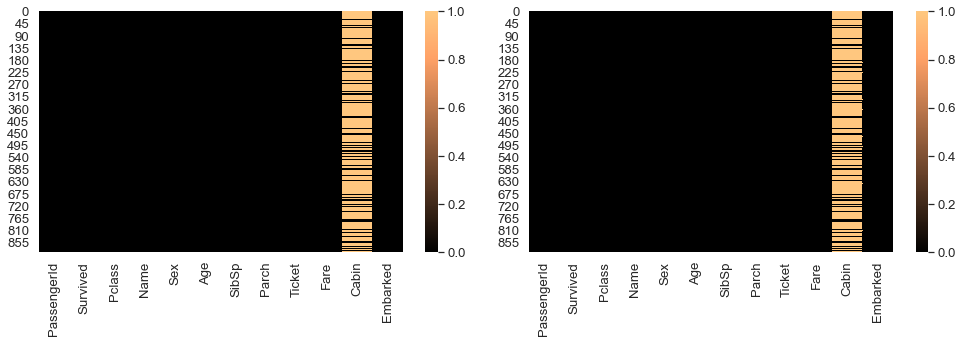

In [554]:
train_data['Age'] = train_data[['Name', 'Age']].apply(fill_age,axis=1)
test_data['Age'] = test_data[['Name', 'Age']].apply(fill_age,axis=1)

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(14,5))
sns.heatmap(train_data.isnull(),cmap='copper', ax=ax1)
sns.heatmap(train_data.isnull(), cmap='copper', ax=ax2)
plt.tight_layout()

Almost all the data from Cabin is lost, i think we could make some assumptions to figure out a way to fill it, for example, let's keep only the first letter and fill the missing ones with X.

In [555]:
train_data['Cabin'] = pd.Series(['X' if pd.isnull(ii) else ii[0] for ii in train_data['Cabin']])
test_data['Cabin'] = pd.Series(['X' if pd.isnull(ii) else ii[0] for ii in test_data['Cabin']])

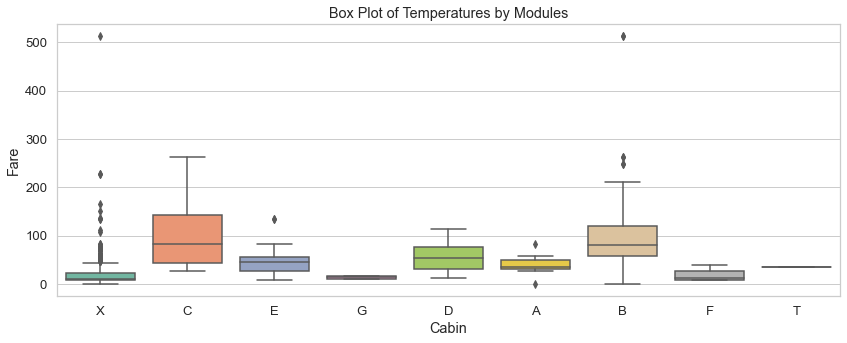

In [556]:
plt.figure(figsize=(12,5))
plt.title('Box Plot of Temperatures by Modules')
sns.boxplot(x='Cabin',y='Fare',data=train_data, palette='Set2')
plt.tight_layout()

We can see the mean of the missing X class is very low, this means that people without a cabin assign had, in almost every case, a lower fare, but there is some outliers that we can handle. We could take those outliers and assign them to class C or B since they have a higher Fare, lets do that. I'm going to make the ssumption that people without a Cabin assigned payed a low fare, so everyone with a relative high fare in class X is an outlier, therefor i will reasign them using the mean of the rest of the classes.

In [557]:
print('Mean Fare of Cabin B {}'.format(train_data[train_data['Cabin']=='B']['Fare'].mean()))
print('Mean Fare of Cabin C {}'.format(train_data[train_data['Cabin']=='C']['Fare'].mean()))
print('Mean Fare of Cabin D {}'.format(train_data[train_data['Cabin']=='D']['Fare'].mean()))
print('Mean Fare of Cabin E {}'.format(train_data[train_data['Cabin']=='E']['Fare'].mean()))

Mean Fare of Cabin B 113.50576382978724
Mean Fare of Cabin C 100.1513406779661
Mean Fare of Cabin D 57.24457575757575
Mean Fare of Cabin E 46.02669375


In [558]:
def reasign_cabin(cabin_fare):
    
    cabin = cabin_fare[0]
    fare = cabin_fare[1]
    
    if cabin=='X':
        if (fare >= 113.5):
            return 'B'
        if ((fare < 113.5) and (fare > 100)):
            return 'C'
        if ((fare < 100) and (fare > 57)):
            return 'D'
        if ((fare < 57) and (fare > 46)):
            return 'D'
        else:
            return 'X'
    else:
        return cabin

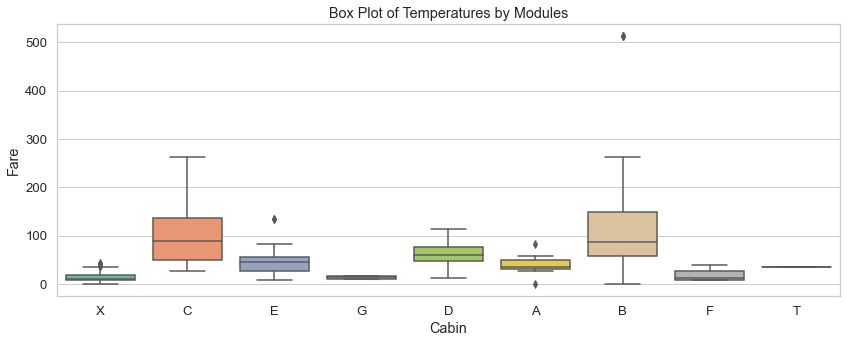

In [559]:
train_data['Cabin'] = train_data[['Cabin', 'Fare']].apply(reasign_cabin, axis=1)
test_data['Cabin'] = test_data[['Cabin', 'Fare']].apply(reasign_cabin, axis=1)

plt.figure(figsize=(12,5))
plt.title('Box Plot of Temperatures by Modules')
sns.boxplot(x='Cabin',y='Fare',data=train_data, palette='Set2')
plt.tight_layout()

Now Cabin X has a low Fare as it should be and there are no more missing values in our dataset.

In [560]:
print('\nNull Values in Training \n{}'.format(train_data.isnull().sum()))


Null Values in Training 
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


## Feature engineering

Feature engineering involves analyze the features and extract usefull information out of it, also creating new features out of existing ones. Let's start by doing some visualitazion

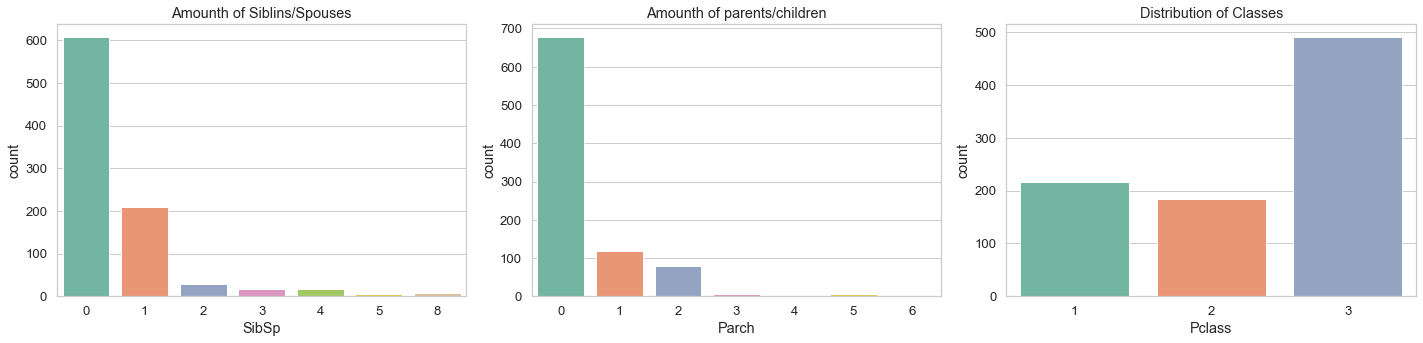

In [561]:
fig, axx = plt.subplots(1, 3, figsize=(20,5))
axx[0].set_title('Amounth of Siblins/Spouses')
sns.countplot(x='SibSp', data=train_data, ax=axx[0])
axx[1].set_title('Amounth of parents/children')
sns.countplot(x='Parch', data=train_data, ax=axx[1])
axx[2].set_title('Distribution of Classes')
sns.countplot(x='Pclass', data=train_data, ax=axx[2])
plt.tight_layout()

According to the graphics, we can see that most of the people were alone and most belonged to 3rd class (lower). This corresponds to waht we saw earlier with the Cabins and the fare, most people without a cabin assign had a small fare, makes sense they belong to class 3. We can create a new feature that specifies if the person was traveling alone or with family based on SibSp and Parch attributes, also the size of the family. Those attributes could be of interest.

In [562]:
def create_alone_feature(SibSp_Parch):
    if (SibSp_Parch[0]+SibSp_Parch[1])==0:
        return 1
    else:
        return 0

In [563]:
train_data['Alone'] = train_data[['SibSp','Parch']].apply(create_alone_feature, axis=1)
train_data['Familiars'] = 1 + train_data['SibSp'] + train_data['Parch']

test_data['Alone'] = test_data[['SibSp','Parch']].apply(create_alone_feature, axis=1)
test_data['Familiars'] = 1 + test_data['SibSp'] + test_data['Parch']

For classification is good to see the data in relation to the label.

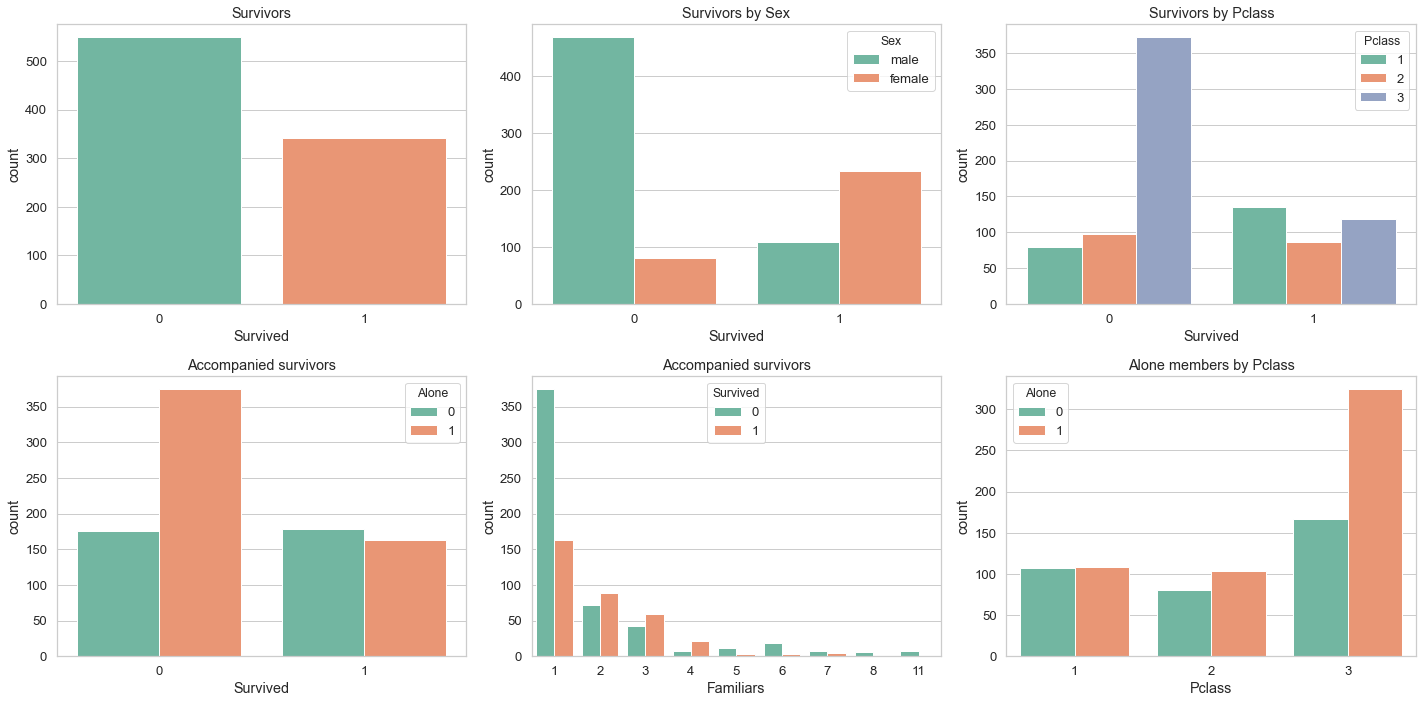

In [564]:
fig, axx = plt.subplots(2, 3, figsize=(20,10))
axx[0,0].set_title('Survivors')
sns.countplot(x='Survived', data=train_data, ax=axx[0,0])
axx[0,1].set_title('Survivors by Sex')
sns.countplot(x='Survived', hue='Sex', data=train_data, ax=axx[0,1])
axx[0,2].set_title('Survivors by Pclass')
sns.countplot(x='Survived', hue='Pclass', data=train_data, ax=axx[0,2])
axx[1,0].set_title('Accompanied survivors')
sns.countplot(x='Survived', hue='Alone', data=train_data, ax=axx[1,0])
axx[1,1].set_title('Accompanied survivors')
sns.countplot(x='Familiars', hue='Survived', data=train_data, ax=axx[1,1])
axx[1,2].set_title('Alone members by Pclass')
sns.countplot(x='Pclass', hue='Alone', data=train_data, ax=axx[1,2])
plt.tight_layout()

From the countplots we can see that most people died in the incident. Although most of the passengers were males, most of the survivals were womans, of course, ship workers and staff were probaly males in mayority, so it makes sense. We can see also that the mayority of dead ones belonged to 3rd class (low class people), they were probably evacuated last and possibly were located in parts of the ship with more difficult acces. Most of those who died were alone, this makes sense cause people from 3rd class were mostly alone  and were the ones who died the most. Now let's see the age and the fare of the survivors.

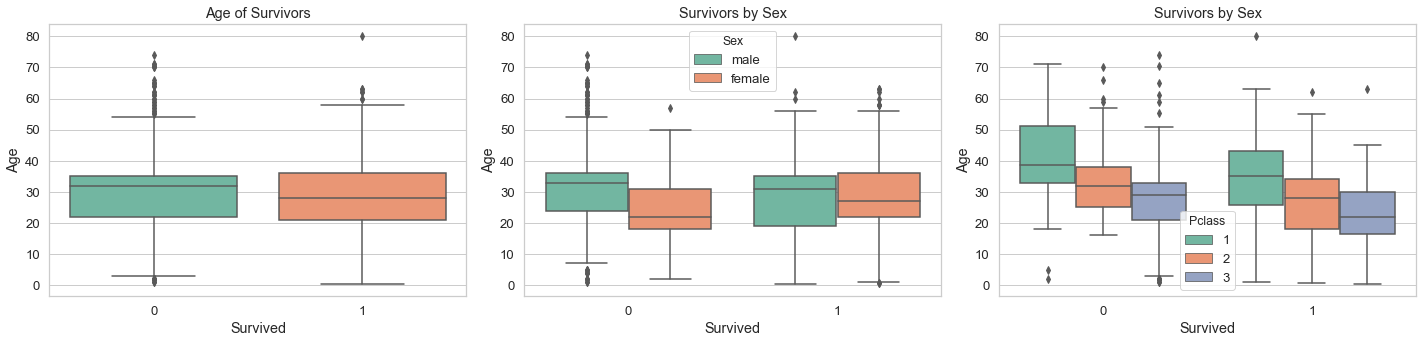

In [565]:
fig, axx = plt.subplots(1, 3, figsize=(20,5))
axx[0].set_title('Age of Survivors')
sns.boxplot(x='Survived', y='Age', data=train_data, ax=axx[0])
axx[1].set_title('Survivors by Sex')
sns.boxplot(x='Survived', y='Age', hue='Sex', data=train_data, ax=axx[1])
axx[2].set_title('Survivors by Sex')
sns.boxplot(x='Survived', y='Age', hue='Pclass', data=train_data, ax=axx[2])
plt.tight_layout()

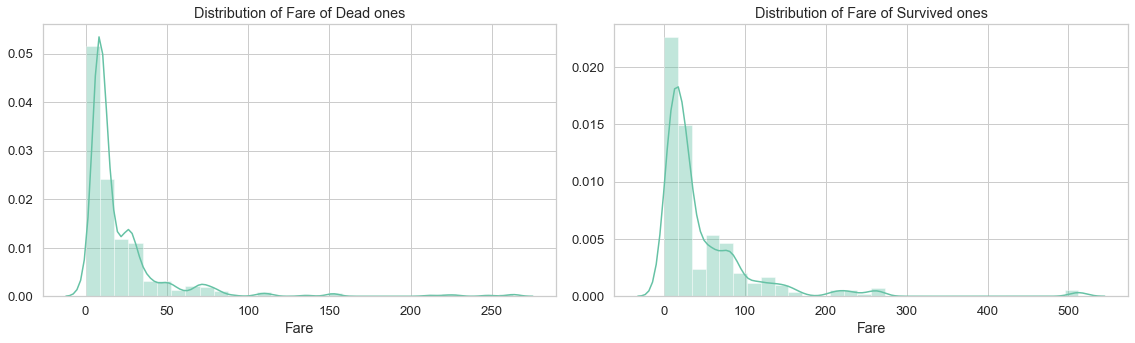

In [566]:
fig, axx = plt.subplots(1, 2, figsize=(16,5))
axx[0].set_title('Distribution of Fare of Dead ones')
sns.distplot(a=train_data[train_data['Survived']==0]['Fare'], ax=axx[0], bins=30)
axx[1].set_title('Distribution of Fare of Survived ones')
sns.distplot(a=train_data[train_data['Survived']==1]['Fare'], ax=axx[1], bins=30)
plt.tight_layout()

Clearly the Fare of those ho survived were higher, we can see that in the distribution of each one. Those ho survived where a little bit younger than those ho died. We can also see that people in 1st class were older than the rest and people from 3rd class were younger. Next we can see the correlation between the features. Fare and Survived has som correlation between, but correlation doesn't take into account categoricals, so better to map features like Sex and Embarked to numbers. 

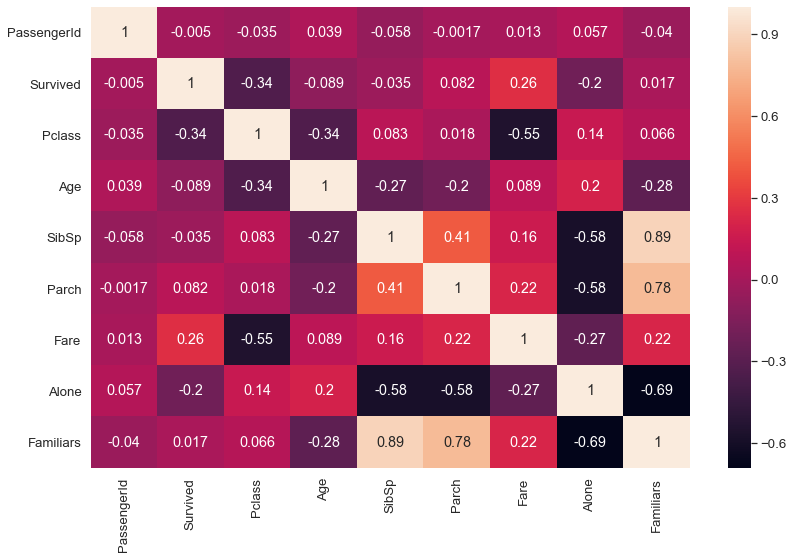

In [567]:
plt.figure(figsize=(12,8))
sns.heatmap(train_data.corr(), annot=True)
plt.tight_layout()

### Mapping Categoricals 

Machine Learning algorithms deals with numbers and not categorical, so we need to find a way to map these categories into numbers. This is easy to do in Pandas using `map()` method. I will define 1 for female and 0 for males, to have a positive correlation since most of the survivals were females.

In [568]:
categories = {"female": 1, "male": 0}
train_data['Sex']= train_data['Sex'].map(categories)
test_data['Sex']= test_data['Sex'].map(categories)

In [569]:
categories = {"S": 1, "C": 2, "Q": 3}
train_data['Embarked']= train_data['Embarked'].map(categories)
test_data['Embarked']= test_data['Embarked'].map(categories)

categories = train_data.Cabin.unique()
train_data['Cabin'] = train_data.Cabin.astype("category").cat.codes
test_data['Cabin'] = test_data.Cabin.astype("category").cat.codes

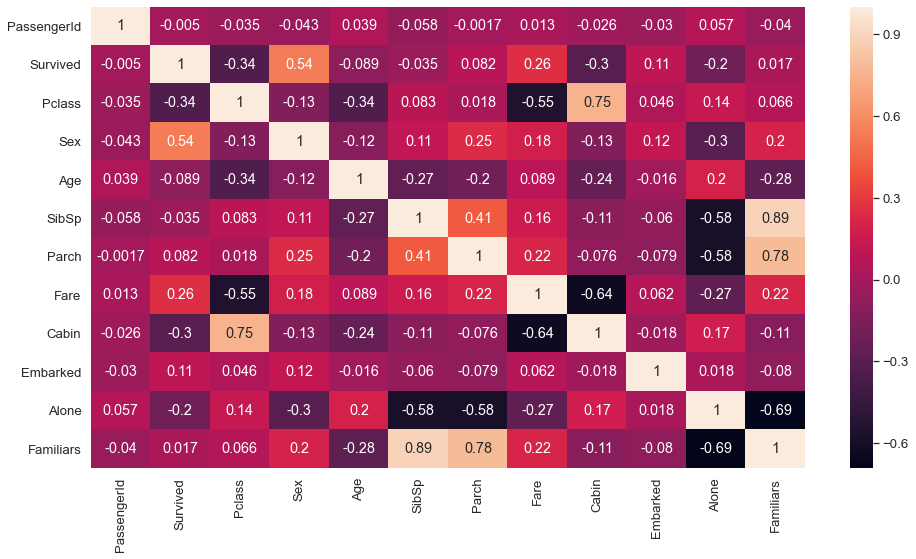

In [570]:
plt.figure(figsize=(14,8))
sns.heatmap(train_data.corr(), annot=True)
plt.tight_layout()

Ok, now let's drop the non importance features like the name and ticket number.

In [571]:
# dropping columns
train_data = train_data.drop(['Name','Ticket','PassengerId'], axis=1)
test_data = test_data.drop(['Name','Ticket','PassengerId'], axis=1)
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Alone,Familiars
0,0,3,0,22.0,1,0,7.2500,8,1,0,2
1,1,1,1,38.0,1,0,71.2833,2,2,0,2
2,1,3,1,26.0,0,0,7.9250,8,1,1,1
3,1,1,1,35.0,1,0,53.1000,2,1,0,2
4,0,3,0,35.0,0,0,8.0500,8,1,1,1


### Normalize the data

Many machine learning algorithms like Regression types and distance based ones can converge faster when the data is normalized, this is a key step in every machine learning situation. To do so i will use `MinMaxScaler` library from Sklearn, but first we need to drop the label. When scaling, we only fit the scaler to the training dataset.

In [572]:
from sklearn.preprocessing import MinMaxScaler

In [573]:
# Dropping label
LABEL = 'Survived'
y = train_data[LABEL]
train_data = train_data.drop(LABEL, axis=1)  # Dropping label to normalize

In [574]:
scaler = MinMaxScaler()
scaled_train = scaler.fit_transform(train_data)
scaled_test = scaler.transform(test_data)

scaled_train = pd.DataFrame(scaled_train, columns=train_data.columns, index=train_data.index)
scaled_test = pd.DataFrame(scaled_test, columns=test_data.columns, index=test_data.index)

In [575]:
scaled_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Alone,Familiars
0,1.0,0.0,0.271174,0.125,0.0,0.014151,1.00,0.0,0.0,0.1
1,0.0,1.0,0.472229,0.125,0.0,0.139136,0.25,0.5,0.0,0.1
2,1.0,1.0,0.321438,0.000,0.0,0.015469,1.00,0.0,1.0,0.0
3,0.0,1.0,0.434531,0.125,0.0,0.103644,0.25,0.0,0.0,0.1
4,1.0,0.0,0.434531,0.000,0.0,0.015713,1.00,0.0,1.0,0.0


## Classification

I will use Random Forest Classifier. Random forests is a supervised learning algorithm. It can be used both for classification and regression. It is also the most flexible and easy to use algorithm. You can read more about it in [here](https://www.datacamp.com/community/tutorials/random-forests-classifier-python). Let's split the data to use a testing set with labels.

In [610]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [589]:
X_train, X_test, y_train, y_test = train_test_split(scaled_train, y, test_size=0.2)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(712, 10) (179, 10)
(712,) (179,)


In [590]:
clf = RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

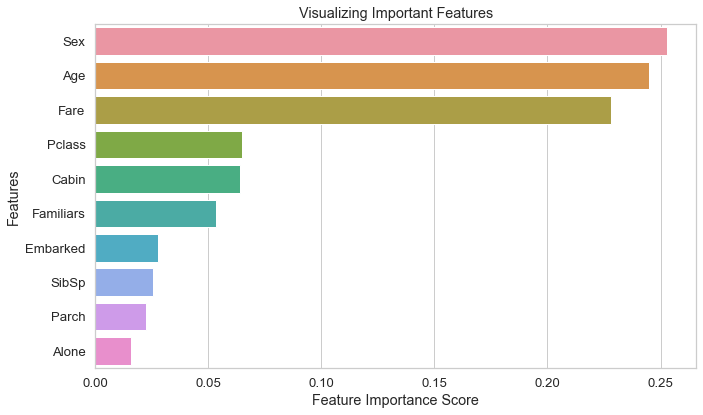

In [591]:
feature_imp = pd.Series(clf.feature_importances_, index=scaled_train.columns).sort_values(ascending=False)

#print("Accuracy: {}".format(metrics.accuracy_score(y_test, y_pred)))

plt.figure(figsize=(10,6))
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.tight_layout()

We can remove the less importat features for the algorithm, and see if the accuracy improves. With all the features the accuracy was 82%.

In [607]:
y_pred = clf.predict(X_test)

print("Accuracy: {}".format(metrics.accuracy_score(y_test, y_pred)))

Accuracy: 0.8212290502793296


In [620]:
# Removing less important features
new_train = scaled_train.drop(['Alone','Parch','Embarked'], axis=1)
new_test = scaled_test.drop(['Alone','Parch','Embarked'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(new_train, y, test_size=0.2)
clf = RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("   Accuracy: {}".format(metrics.accuracy_score(y_test, y_pred)))

print(classification_report(y_test,y_pred))

   Accuracy: 0.8547486033519553
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       115
           1       0.81      0.78      0.79        64

    accuracy                           0.85       179
   macro avg       0.84      0.84      0.84       179
weighted avg       0.85      0.85      0.85       179



Removing the less important features we can see that acuraccy improves, also our model is better identifyng dead people than survivors, after all, he saw more dead ones. Let's see our confussion matrix and make a prediction in our original test dataset.

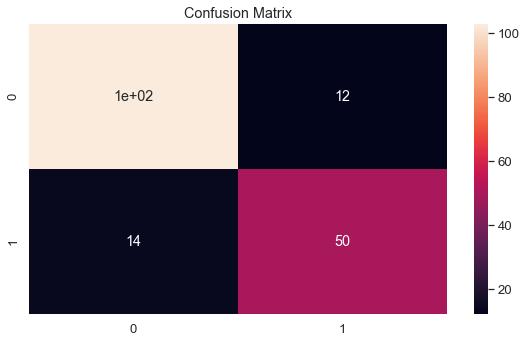

In [622]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,5))
sns.heatmap(conf_matrix, annot=True)
plt.title('Confusion Matrix')
plt.tight_layout()

In [624]:
prediction = clf.predict(new_test)

test_data['Survival_Predictions'] = pd.Series(prediction)
test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Alone,Familiars,Survival_Predictions
0,3,0,34.5,0,0,7.8292,7,3,1,1,0
1,3,1,47.0,1,0,7.0000,7,1,0,2,0
2,2,0,62.0,0,0,9.6875,7,3,1,1,0
3,3,0,27.0,0,0,8.6625,7,1,1,1,1
4,3,1,22.0,1,1,12.2875,7,1,0,3,0
